
<br><br>

### Considere o dataset abaixo:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("dataframe_exercicio_modulo_8.csv")
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidade;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

<br>
<br>

# Exercícios

<br>

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 

#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)



## Parte 2:

### 1 - 

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 

### 2 - 

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.



In [2]:
from numpy.random import RandomState

# PARTE 1 - 25% dados de teste | 75% dados de treino

def divideDados(df, perc_teste):
    rng = RandomState()
    df_teste = df.sample(frac=perc_teste, random_state=rng)
    df_treino = df.loc[~df.index.isin(df_teste.index)]
    return df_teste, df_treino

In [3]:
df_teste, df_treino = divideDados(df, 0.25)

In [4]:
# PARTE 2
# 2.1 Usando apenas UMA variável, crie modelos de aprendizado de máquina para prever a quantidade de crimes a 
# partir desta única variável. Justifique a escolha desta variável.

# Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos 
#estão sofrendo overfitting.

# JUSTIFICATIVA
# A variável feature será 'perc_pol', pois já que meu objetivo neste exercício é prever a quantidade de crimes
# acredito que essa feature me ajudará a prever quais fatores impactam na REDUÇÂO da quantidade de crimes.  
# Certamente será uma análise raza, porque não acredito que apenas a quantidade de policiais ativos na cidade 
# impacte totalmente na quantidade de crimes, mas na sequência do exercício, podendo relacionar com as demais 
# variáveis, a predição será mais coerente com os dados oferecidos.

# Os resultados na sequência demonstram uma relação linear negativa entre as variáveis, o que posso dizer, 
# se enquadra na premissa usada para a escolha da feature, já que quanto maior o percentual de policiais 
# ativos, menor a quantidade de crimes. 

df_treino.info(), df_treino.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1845 entries, 1 to 2459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ind_pop_cid  1845 non-null   float64
 1   perc_pol     1845 non-null   float64
 2   taxa_crim    1845 non-null   float64
 3   nivel_ed     1845 non-null   float64
 4   crimes       1845 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 86.5 KB


(None, (1845, 5))

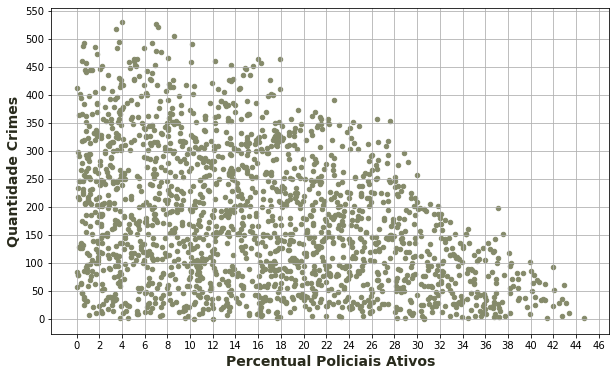

In [5]:
# dispersão dos dados variáveis: crimes x perc_pol

plt.figure(figsize=[10,6])
plt.scatter(df_treino['perc_pol'], df_treino['crimes'], s = 20, c = '#858A6A')
plt.xlabel("Percentual Policiais Ativos", fontweight = 'bold', fontsize = 14, c = "#292B1D")
plt.ylabel("Quantidade Crimes", fontweight = 'bold', fontsize = 14, c = "#292B1D")
plt.xticks(range(0,47,2))
plt.yticks(range(0,600,50))
plt.grid()
plt.show()

In [6]:
def funcao_linear(x, theta0, theta1):
    pred = theta0 + theta1 * x
    pred.name = None
    return pred

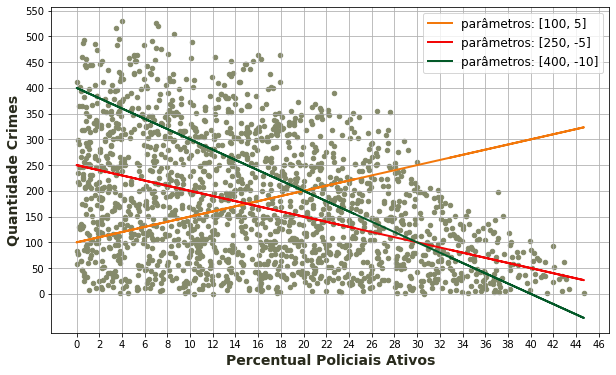

In [7]:
X = df_treino['perc_pol']

y1 = funcao_linear(X, theta0 = 100, theta1 = 5)  # crimes = 100 + 5 * perc_pol
y2 = funcao_linear(X, theta0 = 250, theta1 = -5)  # crimes = 250 - 5 * perc_pol
y3 = funcao_linear(X, theta0 = 400, theta1 = -10) # crimes = 400 - 10 * perc_pol

plt.figure(figsize=[10,6])
plt.scatter(df_treino['perc_pol'], df_treino['crimes'], s = 20, c = '#858A6A')
plt.xlabel("Percentual Policiais Ativos", fontweight = 'bold', fontsize = 14, c = "#292B1D")
plt.ylabel("Quantidade Crimes", fontweight = 'bold', fontsize = 14, c = "#292B1D")
plt.xticks(range(0,47,2))
plt.yticks(range(0,600,50))
plt.grid()

plt.plot(X, y1, label = 'parâmetros: [100, 5]', lw = 2, c = '#F2780C')
plt.plot(X, y2, label = 'parâmetros: [250, -5]', lw = 2, c = '#F20707')
plt.plot(X, y3, label = 'parâmetros: [400, -10]', lw = 2, c = '#035928')
plt.legend(fontsize = 12)
plt.show()

In [8]:
# MSE
X = df_treino['perc_pol']
X

1       24.456750
2       19.791772
4       34.697495
5       16.986504
6        6.940413
          ...    
2455     3.507206
2456    28.222931
2457    13.055995
2458    22.632517
2459    32.937060
Name: perc_pol, Length: 1845, dtype: float64

In [9]:
y = df_treino['crimes']
y

1       202
2       348
4        47
5        34
6       188
       ... 
2455    231
2456     18
2457    217
2458     42
2459     71
Name: crimes, Length: 1845, dtype: int64

In [10]:
# crimes = 250 - 5 * perc_pol
y_pred = funcao_linear(X, theta0 = 250, theta1 = -5)
y_pred

1       127.716249
2       151.041139
4        76.512527
5       165.067482
6       215.297934
           ...    
2455    232.463971
2456    108.885344
2457    184.720025
2458    136.837416
2459     85.314698
Length: 1845, dtype: float64

In [11]:
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [12]:
# RMSE
y1 = funcao_linear(X, theta0 = 100, theta1 = 5)  
y2 = funcao_linear(X, theta0 = 250, theta1 = -5)  
y3 = funcao_linear(X, theta0 = 400, theta1 = -10) 

RMSE_1 = RMSE(y = df_treino['perc_pol'], y_pred = y1)
RMSE_2 = RMSE(y = df_treino['perc_pol'], y_pred = y2)
RMSE_3 = RMSE(y = df_treino['perc_pol'], y_pred = y3)

print("Os respectivos RMSE de cada modelo são: ")
print('Modelo 1: ', RMSE_1)
print('Modelo 2: ', RMSE_2)
print('Modelo 3: ', RMSE_3)

Os respectivos RMSE de cada modelo são: 
Modelo 1:  169.4773979405469
Modelo 2:  166.1208922699051
Modelo 3:  251.5532225587929


In [13]:
# Modelo de Regressão Linear

from sklearn.linear_model import LinearRegression

# encontrando um conjunto de variáveis para minimizar o MSE
# Instanciando algoritmo
lm = LinearRegression()
lm

LinearRegression()

In [14]:
# alterando formato dos dados
X = X.values.reshape(-1,1)
type(X), X.shape

(numpy.ndarray, (1845, 1))

In [15]:
y = y.values.reshape(-1,1)
type(y), y.shape

(numpy.ndarray, (1845, 1))

In [16]:
# fitando o modelo 
lm.fit(X,y)

LinearRegression()

In [17]:
# fazendo predições
ypred = lm.predict(X)
ypred

array([[141.86118078],
       [161.53633889],
       [ 98.66949454],
       ...,
       [189.94536487],
       [149.55512546],
       [106.09435761]])

In [18]:
RMSE(y = y, y_pred = ypred)

111.58653043717386

In [19]:
# parâmetros encontrados pelo modelo de regressão linear
lm.intercept_, lm.coef_

(array([245.01074075]), array([[-4.21763149]]))

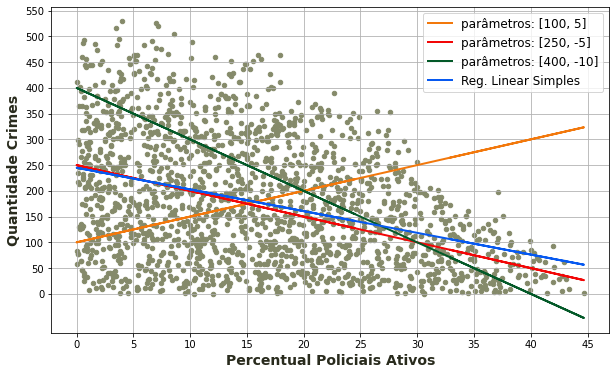

In [20]:
# comparando o novo modelo com o criado anteriormente

X = df_treino['perc_pol']
y1 = funcao_linear(X, theta0 = 100, theta1 = 5)  
y2 = funcao_linear(X, theta0 = 250, theta1 = -5)  
y3 = funcao_linear(X, theta0 = 400, theta1 = -10) 

plt.figure(figsize=[10,6])
plt.scatter(df_treino['perc_pol'], df_treino['crimes'], s = 20, c = '#858A6A')
plt.xlabel("Percentual Policiais Ativos", fontweight = 'bold', fontsize = 14, c = "#292B1D")
plt.ylabel("Quantidade Crimes", fontweight = 'bold', fontsize = 14, c = "#292B1D")
plt.xticks(range(0,50,5))
plt.yticks(range(0,600,50))
plt.grid()

plt.plot(X, y1, label = 'parâmetros: [100, 5]', lw = 2, c = '#F2780C')
plt.plot(X, y2, label = 'parâmetros: [250, -5]', lw = 2, c = '#F20707')
plt.plot(X, y3, label = 'parâmetros: [400, -10]', lw = 2, c = '#035928')
plt.plot(X, ypred, c = '#0759F0', lw = 2, label = 'Reg. Linear Simples')
plt.legend(fontsize = 12)
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# overfiting
X = df_treino['perc_pol'].values.reshape(-1,1)
y = df_treino['crimes'].values

lm

LinearRegression()

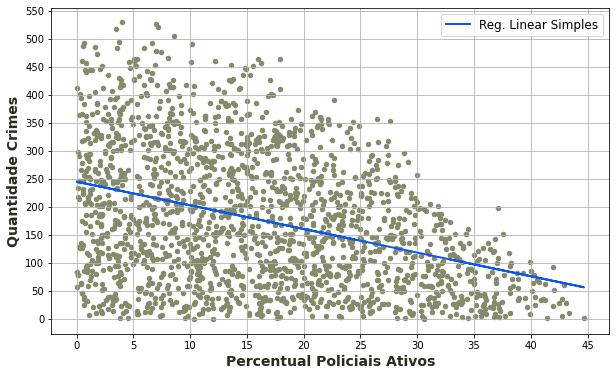

In [22]:
plt.figure(figsize=[10,6])
plt.scatter(df_treino['perc_pol'], df_treino['crimes'], s = 20, c = '#858A6A')
plt.xlabel("Percentual Policiais Ativos", fontweight = 'bold', fontsize = 14, c = "#292B1D")
plt.ylabel("Quantidade Crimes", fontweight = 'bold', fontsize = 14, c = "#292B1D")
plt.xticks(range(0,50,5))
plt.yticks(range(0,600,50))
plt.grid()

lm_preds = lm.predict(X)
plt.plot(X, lm_preds, c = '#0759F0', lw = 2, label = 'Reg. Linear Simples')
plt.legend(fontsize = 12)
plt.show()

In [23]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X, y)
print("RMSE do KNN com 5 vizinhos: ", RMSE(y = y, y_pred = knn.predict(X)))

RMSE do KNN com 5 vizinhos:  97.86938189893269


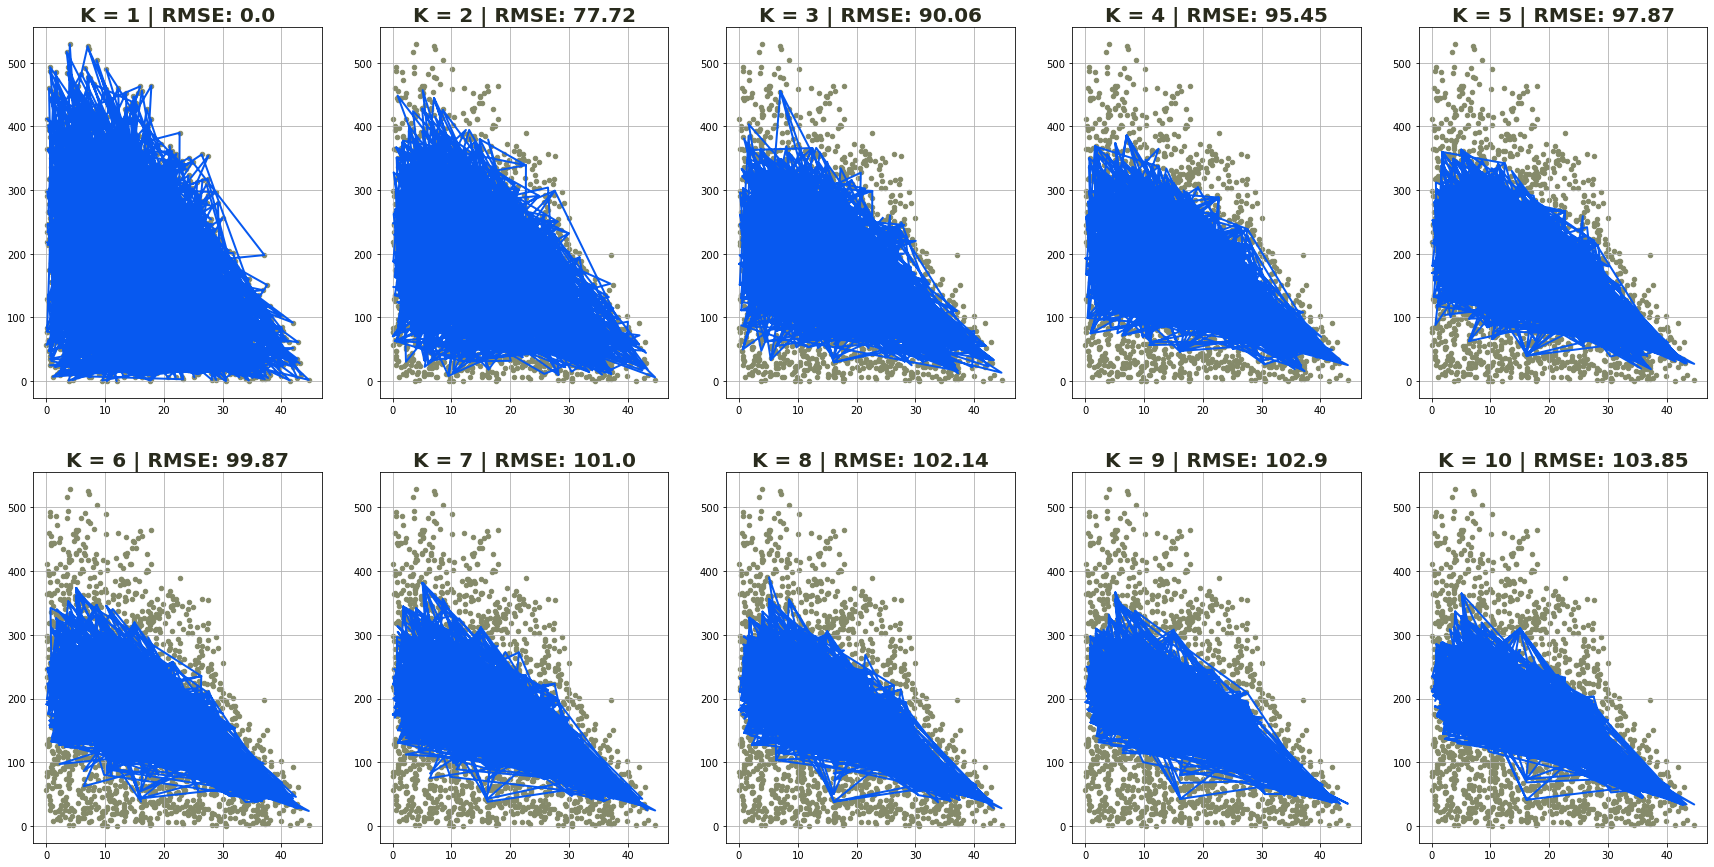

In [24]:
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold', c = "#292B1D")
    plt.plot(X, knn.predict(X), c = '#0759F0', lw = 2)
    plt.scatter(df_treino['perc_pol'], df_treino['crimes'], s = 20, c = '#858A6A')
    plt.grid()

plt.show()

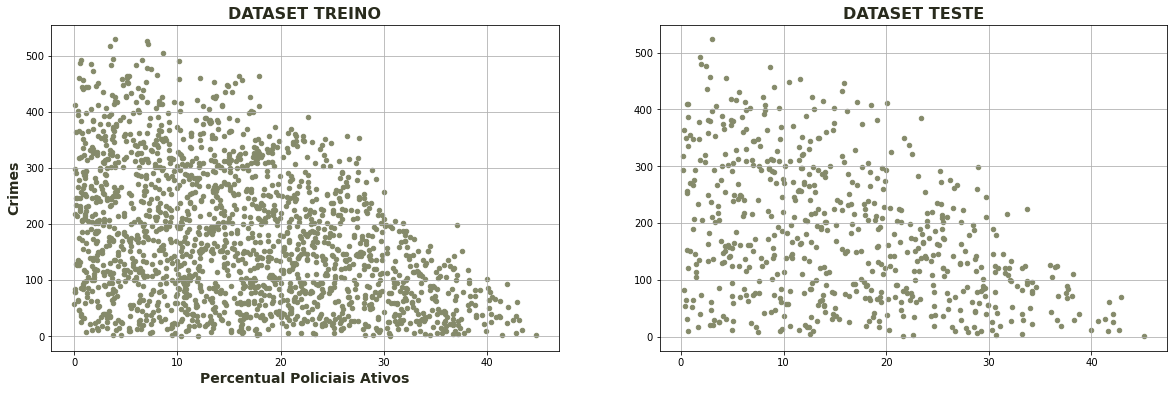

In [25]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title("DATASET TREINO", fontsize = 16, fontweight = 'bold', c = "#292B1D")
plt.scatter(df_treino['perc_pol'], df_treino['crimes'], s = 20, c = '#858A6A')
plt.grid()
plt.xlabel("Percentual Policiais Ativos", fontsize = 14, fontweight = 'bold', c = "#292B1D")
plt.ylabel("Crimes", fontsize = 14, fontweight = 'bold', c = "#292B1D")
plt.subplot(1,2,2)
plt.title("DATASET TESTE", fontsize = 16, fontweight = 'bold', c = "#292B1D")
plt.scatter(df_teste['perc_pol'], df_teste['crimes'], s = 20, c = '#858A6A')
plt.grid()
plt.show()

In [26]:
def plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo):
    
    modelo.fit(X, y)
    
    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_novo = modelo.predict(Xnovo)
    
    rmse_dataset_treino = np.round(RMSE(y = y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_novo = np.round(RMSE(y = ynovo, y_pred = predicao_dataset_novo), 2)
    
    plt.figure(figsize = [20,6])
    plt.subplot(1,2,1)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
              fontsize = 14, fontweight = 'bold', c = '#292B1D')
    plt.scatter(X, y, c = '#858A6A', s = 20)
    plt.plot(X, predicao_dataset_treino, c = '#0759F0', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.subplot(1,2,2)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TESTE: " + str(rmse_dataset_novo),
              fontsize = 14, fontweight = 'bold', c = "#292B1D")
    plt.scatter(Xnovo, ynovo, c = '#858A6A', s = 20)
    plt.plot(Xnovo, predicao_dataset_novo, c = '#0759F0', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.show()

In [27]:
X = df_treino['perc_pol'].values.reshape(-1,1)
y = df_treino['crimes'].values
Xnovo = df_teste['perc_pol'].values.reshape(-1,1)
ynovo = df_teste['crimes'].values

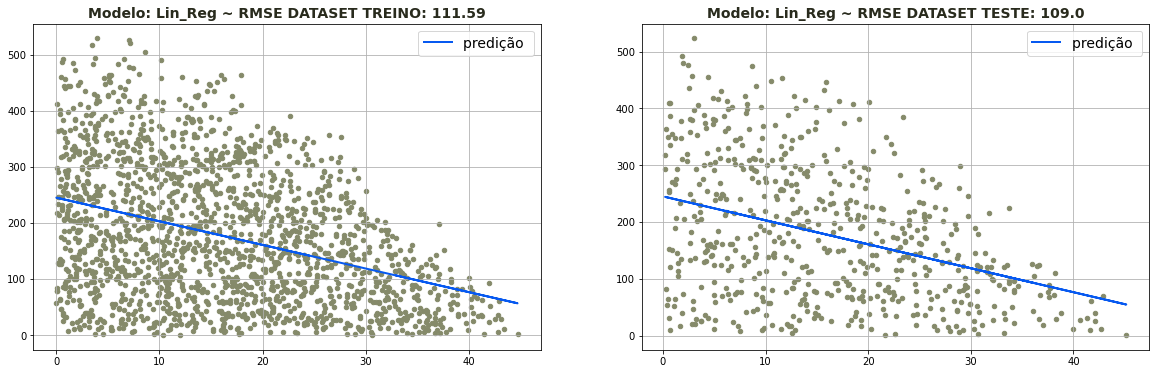

In [28]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

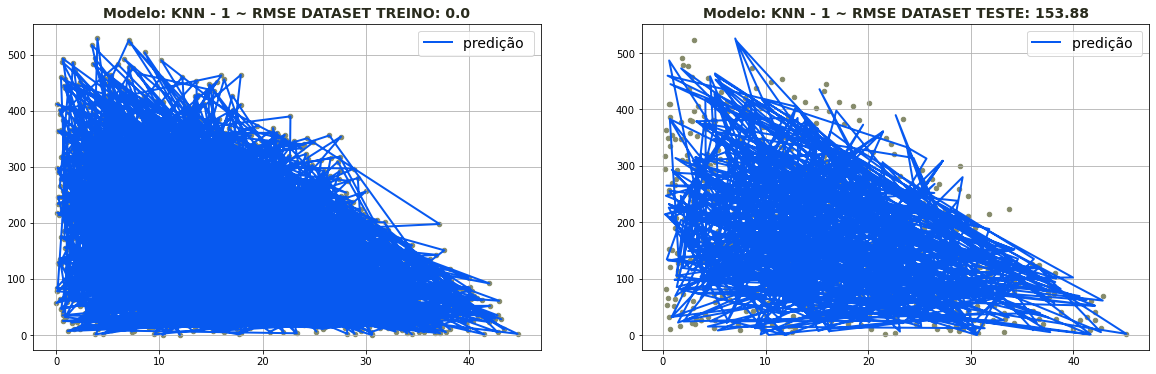

In [29]:
modelo = KNeighborsRegressor(n_neighbors = 1)
nome_modelo = 'KNN - 1'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

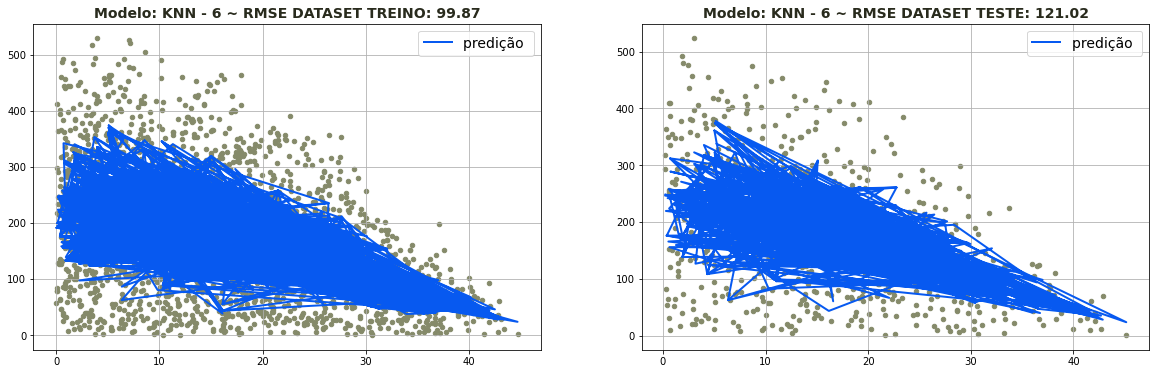

In [30]:
modelo = KNeighborsRegressor(n_neighbors = 6)
nome_modelo = 'KNN - 6'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

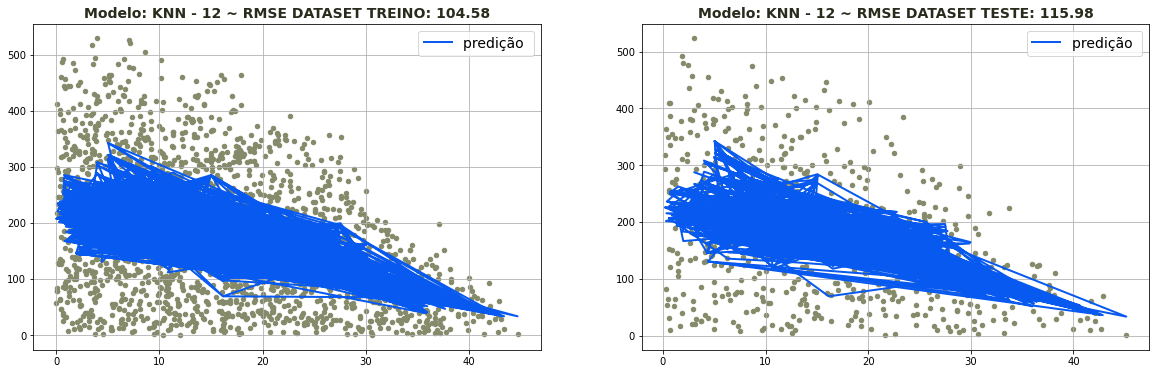

In [31]:
modelo = KNeighborsRegressor(n_neighbors = 12)
nome_modelo = 'KNN - 12'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

In [32]:
# Parte 2
# 2.2 Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.

df_treino.describe()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
count,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000
mean,3.091057,16.047849,64.848172,5.063415,177.326829
std,1.425424,10.502175,23.560507,2.807217,120.084519
min,1.000000,0.014848,0.644731,1.000000,0.000000
25%,2.000000,7.078650,47.697115,3.000000,77.000000
50%,3.000000,15.017562,68.204699,5.000000,157.000000
75%,4.000000,23.606789,84.656230,7.000000,264.000000
max,5.000000,44.688356,99.976838,10.000000,529.000000


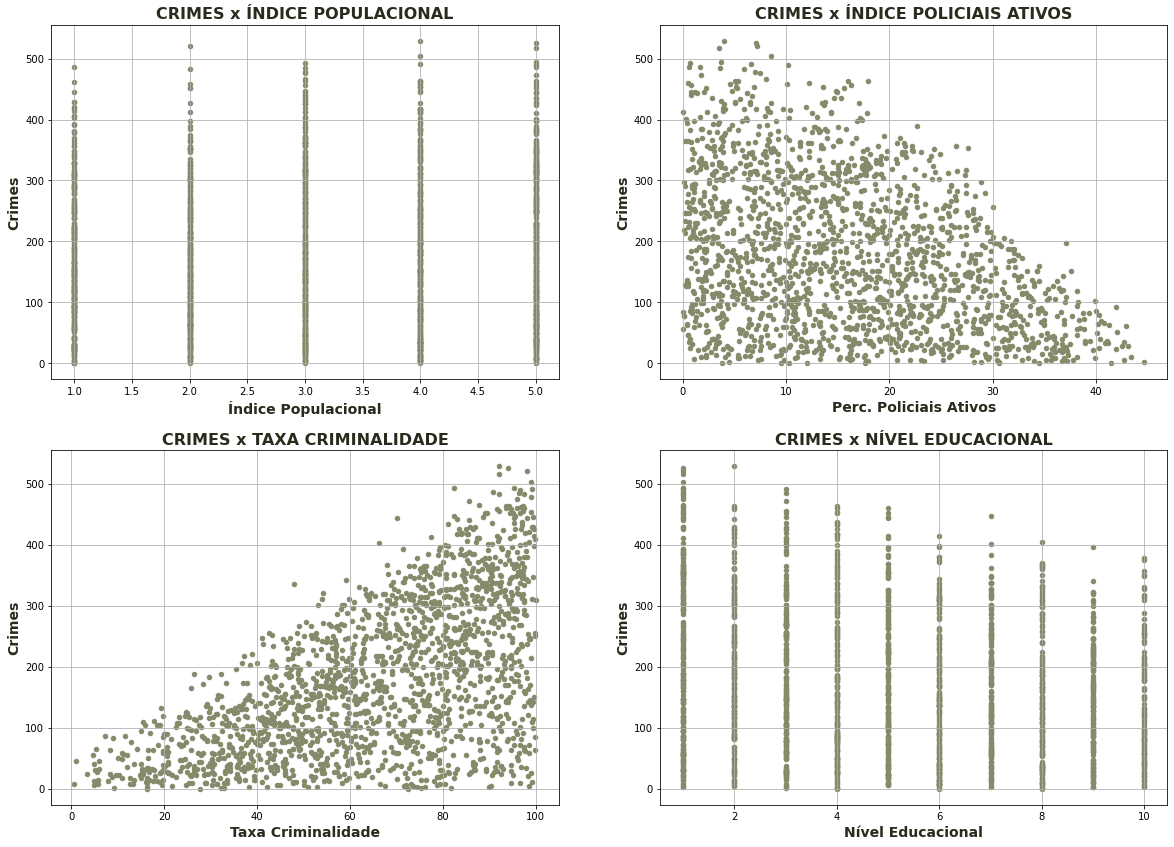

In [33]:
# dispersão dos dados variáveis

plt.figure(figsize=[20,30])
# dispersão crimes x indice populacional
# obs.: variável categorica | não apropriada para esta análise
plt.subplot(4,2,1)
plt.title("CRIMES x ÍNDICE POPULACIONAL", fontsize = 16, fontweight = 'bold', c = "#292B1D")
plt.ylabel("Crimes", fontsize = 14, fontweight = 'bold', c = "#292B1D")
plt.xlabel("Índice Populacional", fontsize = 14, fontweight = 'bold', c = "#292B1D")
plt.scatter(df_treino['ind_pop_cid'], df_treino['crimes'], s = 20, c = '#858A6A')
plt.grid()
# dispersão crimes x percentual policiais ativos
#obs.: relação linear negativa
plt.subplot(4,2,2)
plt.title("CRIMES x ÍNDICE POLICIAIS ATIVOS", fontsize = 16, fontweight = 'bold', c = "#292B1D")
plt.ylabel("Crimes", fontsize = 14, fontweight = 'bold', c = "#292B1D")
plt.xlabel("Perc. Policiais Ativos", fontsize = 14, fontweight = 'bold', c = "#292B1D")
plt.scatter(df_treino['perc_pol'], df_treino['crimes'], s = 20, c = '#858A6A')
plt.grid()
# dispersão crimes x taxa criminalidade
# obs.: relação linear positiva
plt.subplot(4,2,3)
plt.title("CRIMES x TAXA CRIMINALIDADE", fontsize = 16, fontweight = 'bold', c = "#292B1D")
plt.ylabel("Crimes", fontsize = 14, fontweight = 'bold', c = "#292B1D")
plt.xlabel("Taxa Criminalidade", fontsize = 14, fontweight = 'bold', c = "#292B1D")
plt.scatter(df_treino['taxa_crim'], df_treino['crimes'], s = 20, c = '#858A6A')
plt.grid()
# dispersão crimes x nível educacional
# obs.: variável categórica | não apropriada para esta análise
plt.subplot(4,2,4)
plt.title("CRIMES x NÍVEL EDUCACIONAL", fontsize = 16, fontweight = 'bold', c = "#292B1D")
plt.ylabel("Crimes", fontsize = 14, fontweight = 'bold', c = "#292B1D")
plt.xlabel("Nível Educacional", fontsize = 14, fontweight = 'bold', c = "#292B1D")
plt.scatter(df_treino['nivel_ed'], df_treino['crimes'], s = 20, c = '#858A6A')
plt.grid()
plt.show()

In [34]:
# Regressão Linear Simples
X1_ind_pop = df_treino['ind_pop_cid']
X2_perc_pol = df_treino['perc_pol']
X3_taxa_crim = df_treino['taxa_crim']
X4_nivel_edu = df_treino['nivel_ed']
y1 = df_treino['crimes']

In [35]:
#ajustando os dados de X para o formato correto  
X1 = X1_ind_pop.values.reshape(-1,1)
X2 = X2_perc_pol.values.reshape(-1,1)
X3 = X3_taxa_crim.values.reshape(-1,1)
X4 = X4_nivel_edu.values.reshape(-1,1)

#ajustando os dados de y para o formato correto  
y1 = y1.values.reshape(-1,1)

In [36]:
#fitando - treinando - os modelos aos dados

lm.fit(X1, y1)
lm.fit(X2, y1)
lm.fit(X3, y1)
lm.fit(X4, y1)

LinearRegression()

In [37]:
#fazendo predições X1
ypred1 = lm.predict(X1)
ypred1

array([[215.06696299],
       [215.06696299],
       [196.49138697],
       ...,
       [215.06696299],
       [205.77917498],
       [177.91581095]])

In [43]:
RMSE(y = y1, y_pred = ypred1)

122.97963650724945

In [38]:
#fazendo predições X2
ypred2 = lm.predict(X2)
ypred2

array([[ -2.79436049],
       [ 40.5329662 ],
       [-97.90822387],
       ...,
       [103.09343675],
       [ 14.14873358],
       [-81.55768344]])

In [44]:
RMSE(y = y1, y_pred = ypred2)

160.29234290129688

In [39]:
#fazendo predições X3
ypred3 = lm.predict(X3)
ypred3

array([[-595.24034309],
       [-657.33734766],
       [-403.64641697],
       ...,
       [-587.14403174],
       [-204.46722439],
       [-372.99244865]])

In [45]:
RMSE(y = y1, y_pred = ypred3)

633.2267161421288

In [40]:
#fazendo predições X4
ypred4 = lm.predict(X4)
ypred4

array([[168.62802294],
       [215.06696299],
       [215.06696299],
       ...,
       [140.76465891],
       [168.62802294],
       [215.06696299]])

In [46]:
RMSE(y = y1, y_pred = ypred4)

117.18810326828137